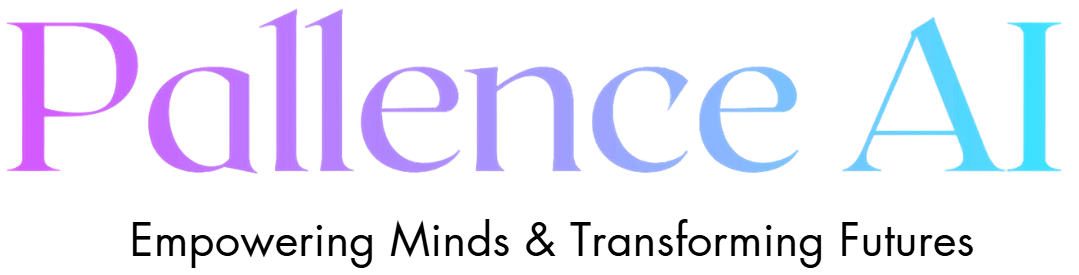

In [1]:
from IPython.display import Image, display
display(Image("./images/PallenceAI-Final.png", width=800))

# Transfer Learning: Leveraging Pretrained Models

**VGG16, Inception, Xception, Resnet, MobileNet etc.**
1. Features learned by a pretrained model can effectively act as generic models of visual world.
2. By using the features learned by pretrained model, we can jump start and potentially enhance our model performance
3. This process is called transfer learning
4. Portability of learned features across different problems is a key advantage of deep learning models

### Advantages of leveraging pretrained models

* Time and Computational Efficiency
* Improved Performance in Low Data Regimes
* Access to low and High-level Features
* Versatility and Adaptability
* Ease of Use and Accessibility

## VGG16 Model

### PreTrained on ImageNet dataset: 1.4 million images with 1000 different classes

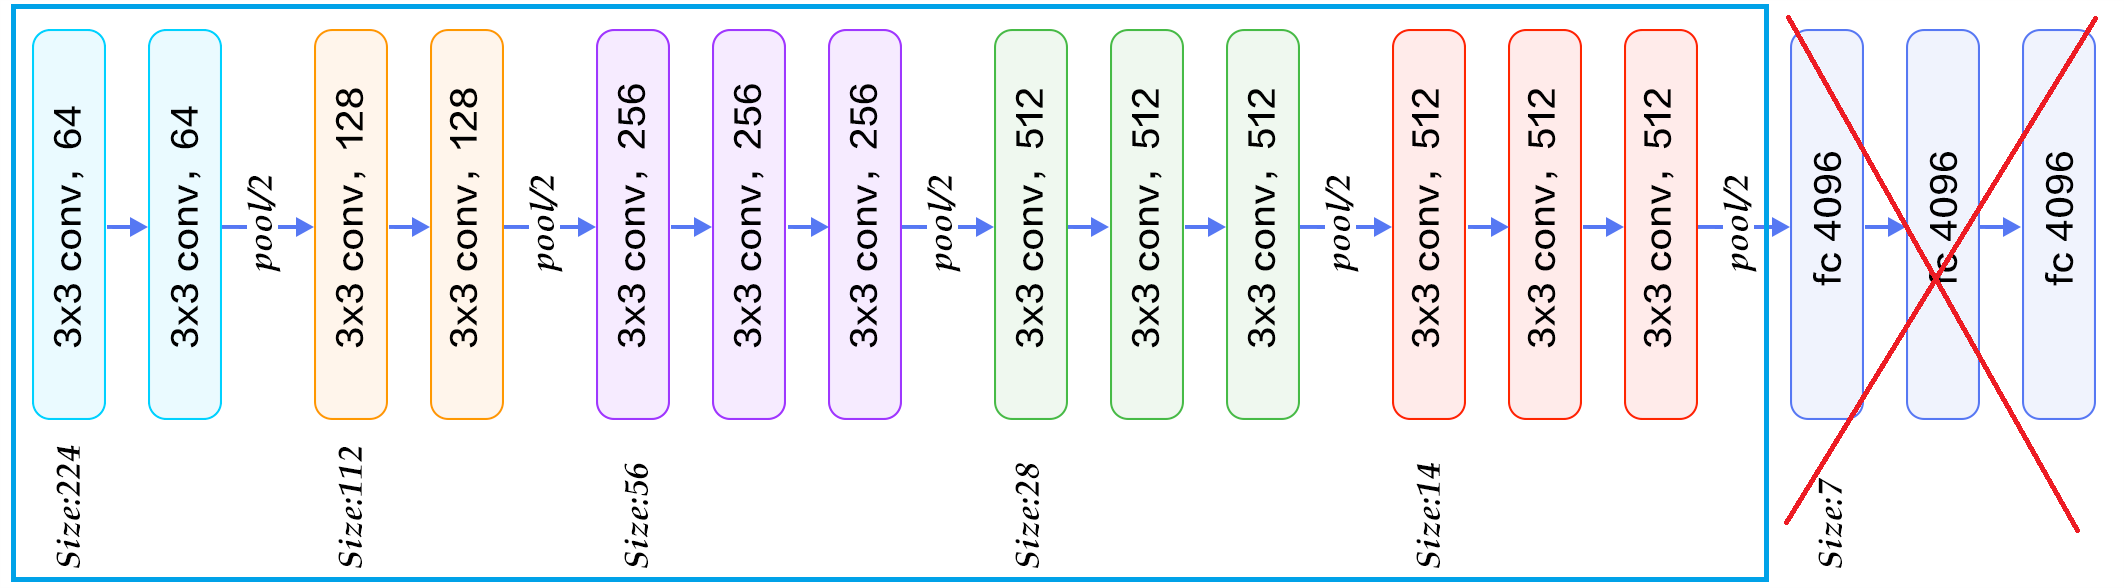

In [2]:
display(Image("./images/vgg16-2.png", width=800))

### Transfer Learning can be done in many different ways depending on the task at hand

1.  Extract the features from pretrained models and use that as a starting point for our training 


2.  Fine tune the pretrained model 
    * By freezing the convbase of the model
    * By freezing some layers and unfreezing some layers
    * By fine-tuning all the layers.

## Feature Extraction

**Import needed libraries**

In [5]:
#### IF you are using Google colab only then please do the following to make it easy to work in colab. 
# Uncomment and run cells in colab

# 1. Mount ur google drive where the course folder is downloaded.
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Set the path to the course directory
# import os
# os.chdir('/content/drive/My Drive/Course-1-Deep-Learning-Mastery-Build-Your-AI-Foundation-main/Section4')
# print("Current Directory:", os.getcwd())

# 3. install the following libraries. u can install any other library also with !pip install "library"
# !pip install tensorflow numpy pandas matplotlib

In [1]:
#Basic Python packages for data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#Tensorflow & Keras related packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras import layers

from utils import plot_history

**Load Cifar Dataset Preloaded in Keras**

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

### Preprocess Data

1. We will preprocess data as the VGG16 model expects
2. We will also convert our training data (train_images,train_labels) into a tf.data object

In [6]:
# This function preprocess the images as per the requirements of vgg16 pretrained model
def preprocess_image(image, label):
    
    image = tf.image.resize(image, [224, 224]) # Resize the image
    image = keras.applications.vgg16.preprocess_input(image)
    
    #image = image / 255.0  # We were scaling our images like this before
    return image, label

In [7]:
# This function is converting our training data into a Tensorflow data objects

# The make_dataset function below efficiently prepares a dataset by converting into tf.data object
# ...by applying necessary preprocessing, organizing data into batches, 
# ...and ensuring data is loaded efficiently through prefetching. 

# This preparation is crucial for training deep learning models effectively and efficiently, 
# ..especially when working with large datasets with tensorflow/keras

def make_dataset(images, labels, batch_size):
    
     #tf.data object for efficient data loading & preprocessing
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))     
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset

# tf.data.experimental.AUTOTUNE allows TensorFlow to dynamically determine the optimal number 
#...of parallel calls to perform when mapping the preprocessing function, improving data loading efficiency.

**Tensorflow Data Objects: tf.data.Dataset**

* tf.data.Dataset is an iterator and will return batches of input data and labels
* Easy way to manipulate training data sets
* Performance optimization: easy implementation of data loading and preprocessing enhancing training speed
* Scalability: it supports wide range of data sources: in memory arrays to distributed file systems
* Basically it streamlines the data handling process and ensures that models can be trained more efficiently and effectively.

The tf.data API is designed for efficient input data pipeline creation. It allows for optimized data loading, preprocessing, and augmentation, which is crucial when dealing with large datasets or when running on distributed systems.

Small Datasets: If your dataset is small and fits into memory, directly using NumPy arrays might be simpler and sufficient.
Large Datasets: For large datasets, or when you need to perform complex preprocessing, shuffling, or augmentations, using tf.data is recommended.

In [8]:
# Preprocess training & test data by converting it into a tf.data.Dataset object and 
#...preprocess as vgg16 model expects the input to be

train_dataset = make_dataset(train_images, train_labels, batch_size=128)
test_dataset = make_dataset(test_images, test_labels, batch_size=128)

In [9]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>

In [10]:
for images, labels in train_dataset.take(3):
    print (images.shape)
    print (labels.shape)

(128, 224, 224, 3)
(128, 1)
(128, 224, 224, 3)
(128, 1)
(128, 224, 224, 3)
(128, 1)


In [11]:
for images, labels in train_dataset.take(1):
    print (labels[0:3])
# looking at first 3 labels in the first batch of training data

tf.Tensor(
[[6]
 [9]
 [9]], shape=(3, 1), dtype=uint8)


In [12]:
for images, labels in train_dataset.take(1):
    print (images[0:3])
# looking at first 3 labels in the first batch of training data

tf.Tensor(
[[[[-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   ...
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]]

  [[-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   ...
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]]

  [[-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   [-40.939003  -54.779     -64.68     ]
   ...
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]
   [ -0.939003    7.2210007  24.32     ]]

  ...

  [[ 12.060997   27.221      53.32     ]
   [ 12.060997   27.221      53.32     ]
   [ 12.060997   27.221      53.32     ]
   ...
   [-31.939003  -24.779      -0.6800003]
   [-31.939003  -24.779      -0.6800003]
   [-

### Load  VGG16 Architecture trained on ImageNet dataset: 1.4 million images with 1000 different classes

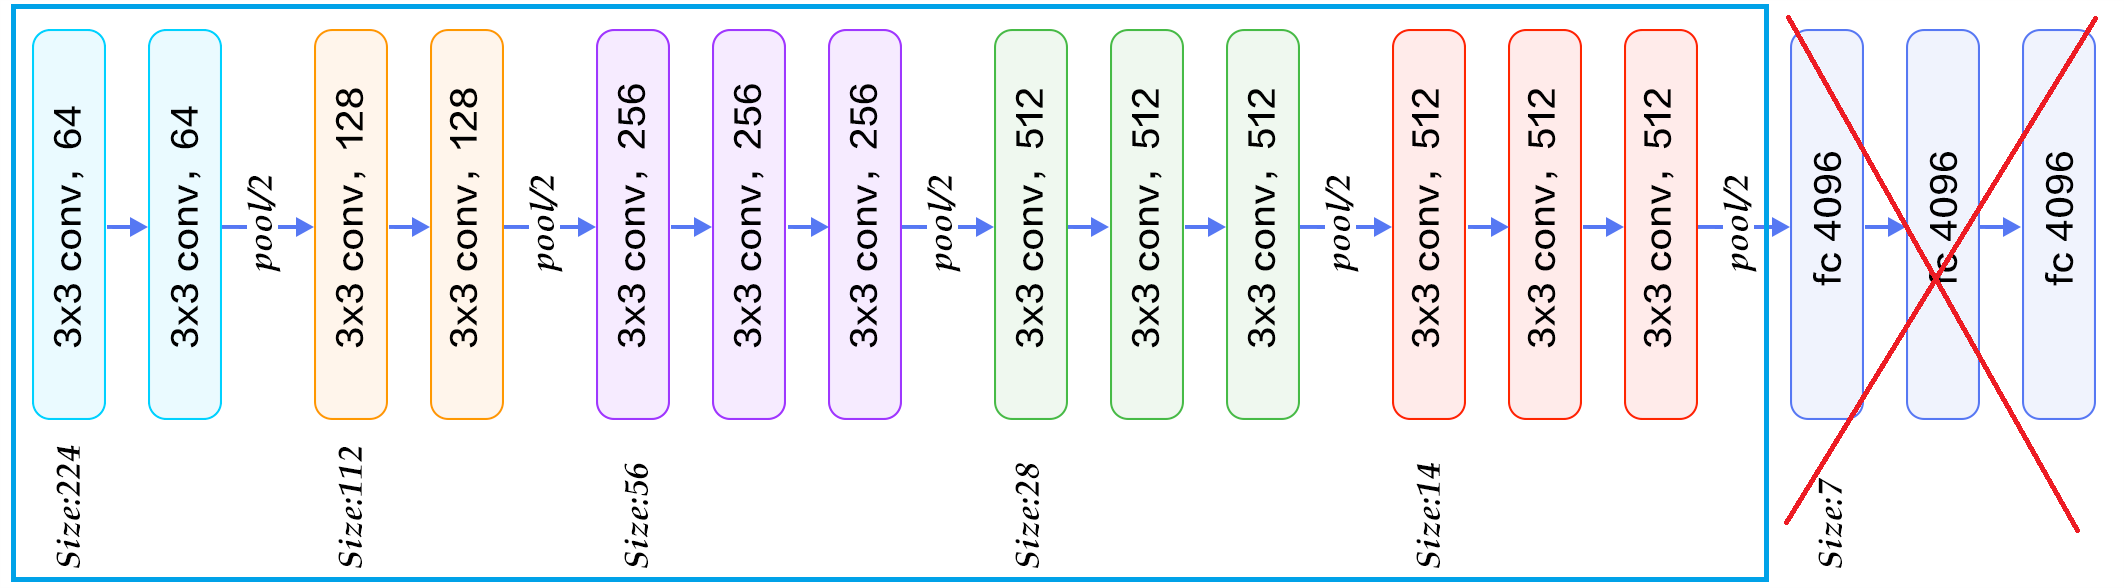

In [3]:
display(Image("./images/vgg16-2.png", width=800))

In [13]:
# Load the Convolution base of the architecture. We will ignore the last three layers
convbase_model = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3))

In [14]:
convbase_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

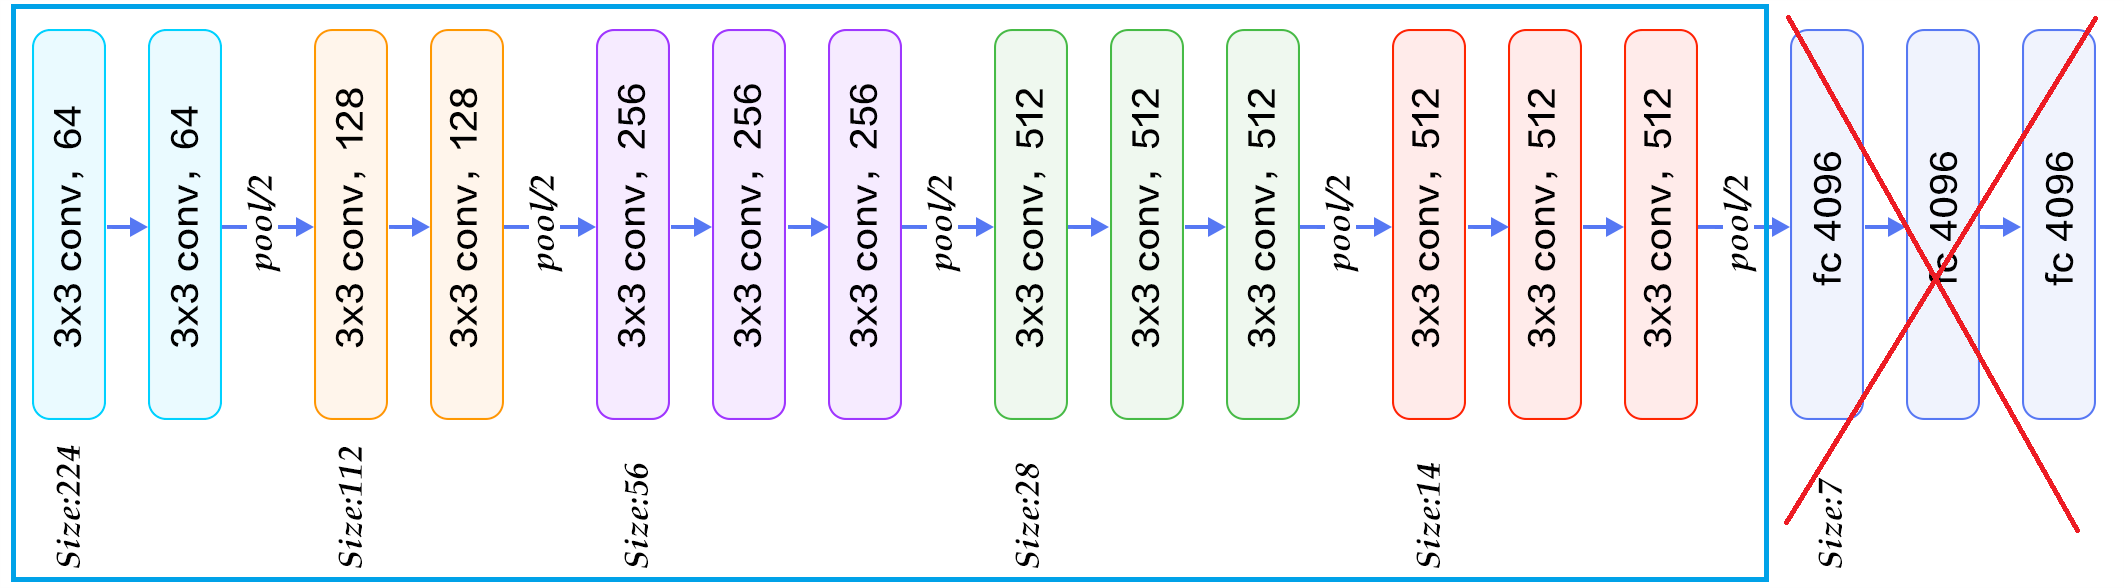

In [4]:
display(Image("./images/vgg16-2.png", width=800))

### Extract Features from the VGG16 Convolutional base

In [15]:
# Define a function to extract the features from VGG16 conv base model
#...when given some input data as tf.data object

def extract_features(tfdata):
    features = []
    labels = []
    
    # we previously preprocessed our data into tf.data objects, on which we iterate
    for batch_images, batch_labels in tfdata: 
        
        #feed our images in batches to the convbase model for inference and extract features.
        vgg16_output = convbase_model.predict(batch_images)  
        features.append(vgg16_output)
        
        labels.append(batch_labels)
        
    return np.concatenate(features), np.concatenate(labels)

In [16]:
 # We get the train features from vgg16 model by giving our training data as input
train_features, train_labels =  extract_features(train_dataset)

4/4 [==============================] - 0s 66ms/step


3/3 [==============================] - 2s 1s/step


In [17]:
train_features.shape

(50000, 7, 7, 512)

In [18]:
type(train_features)

numpy.ndarray

In [19]:
 # Lets get the test features from vgg16 model by giving our testdata as input
test_features, test_labels =  extract_features(test_dataset)
test_features.shape

1/1 [==============================] - 0s 35ms/step


(10000, 7, 7, 512)

### Define our new model architecture

In [20]:
tf.keras.backend.clear_session()

In [21]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
def cifar_vgg16_features(): 
    
    # Define Input shape which is the shape of the output from vgg16 conv base model, 
    #..which is again the shape of train_features
    inputs = keras.Input(shape = (7,7,512)) 
    
    # Flatten layer
    x = layers.Flatten()(inputs) 
    
    # We will add just one Dense layer with 256 units
    x = layers.Dense(256, activation="relu")(x) 
    x = layers.Dropout(0.4)(x) # Dropout layer
    
    # Final dense output layer with 10 units
    outputs = layers.Dense(10, activation="softmax")(x) 
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

### Compile & Train

In [23]:
model = cifar_vgg16_features() # Instantiate the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 7, 512)]       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 6,425,354
Trainable params: 6,425,354
Non-trainable params: 0
_________________________________________________________________


In [24]:
# VGG16 had 14 million parameters to train. 

# Our custom model which will use the features extracted from the convbase pf vgg16 
# ..has only 6 million parameters

In [25]:
# Compile the Model by configuring the  optimizer, loss function & metrics 

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) # sgd optimizer

model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',  metrics = ["accuracy"]) 

C:\Users\sridh\anaconda3\envs\tf2.10_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
## CallBacks

# call back for reducing learning rate as the training proceeds
def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
schedule_lr = keras.callbacks.LearningRateScheduler(lr_scheduler) 

# call back to Save only best model
# model_checkpoint = keras.callbacks.ModelCheckpoint(
#                    filepath = "./models/model_cifar_vgg16features.keras",
#                    save_best_only=True, monitor="val_loss") 

# call back to stop the training early if val accuracy doesnt improve
early_stop = keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                           patience=3, 
                                           restore_best_weights=True)

callbacks = [schedule_lr, early_stop] 

In [27]:
# Train the model
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 32, 
                    validation_split=0.2,callbacks=callbacks) # train the model

Epoch 1/30
1250/1250 [==============================] - 10s 7ms/step - loss: 1.0946 - accuracy: 0.6738 - val_loss: 0.5404 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6552 - accuracy: 0.7906 - val_loss: 0.5222 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.5129 - accuracy: 0.8354 - val_loss: 0.4438 - val_accuracy: 0.8632 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4177 - accuracy: 0.8633 - val_loss: 0.5034 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3614 - accuracy: 0.8814 - val_loss: 0.5034 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3090 - accuracy: 0.8993 - val_loss: 0.4842 - val_accuracy: 0.8696 - lr: 0.0010
Epoch 7/30
1250/1250 [==============================] - 8

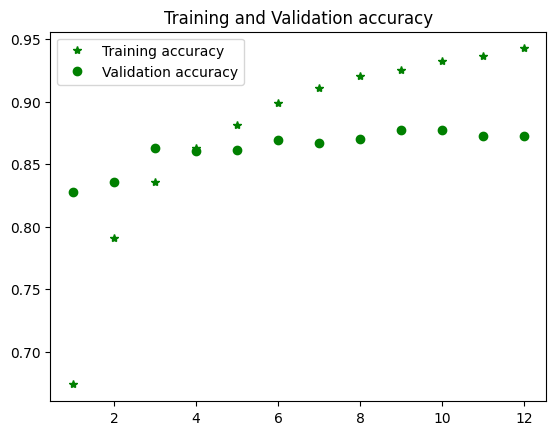

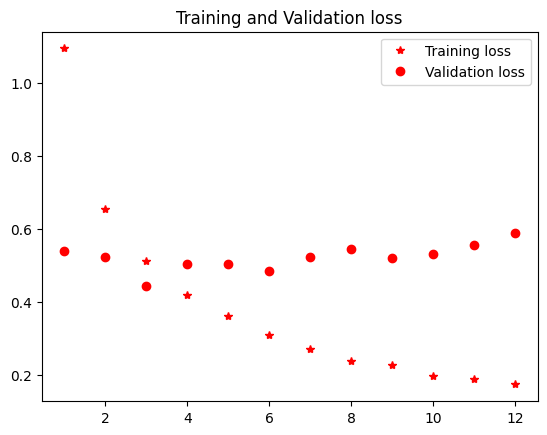

In [28]:
plot_history(history)

In [29]:
# Looks like the model overfitted again after 5th epoch. But validation accuracy is high compared to before
#...where we trained our cifar model from scratch

### Evaluate the model

In [30]:
model.evaluate(test_features, test_labels, batch_size=32) 

313/313 [==============================] - 2s 6ms/step - loss: 0.5720 - accuracy: 0.8722


[0.5719863772392273, 0.8722000122070312]

In [ ]:
# Big improvement over training a model on cifar data from scratch: accuracy = 0.7

### Congratualtions we were able to enhance the model performance significantly by
1. Extracting features from another larger pretrained model
2. Using this extracted features and defining a new architecture with just one dense layer with 256 units